# Nonsolobaschet Stats | 2018

In [2]:
import fanta
import config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scores txt files

### Gianluca | La mamma di Enrico

In [3]:
%%writefile gianluca.txt
gg pf ps gs c mdif
1 77.5 87.5 3 2 0
2 67 68.5 2 4 0
3 74 71.5 1 2 1

Overwriting gianluca.txt


### Fabio | Porti Chiusi Italiani

In [4]:
%%writefile fabio.txt
gg pf ps gs c mdif
1 75 69.5 1 2 0
2 79.5 84 1 2 0
3 74 77.5 1 3 1

Overwriting fabio.txt


### Enrico | Gianlucanonpressare

In [5]:
%%writefile enrico.txt
gg pf ps gs c mdif
1 64.5 83.5 2 2 0
2 67.5 85.5 2 3 1
3 71.5 74 2 6 0

Overwriting enrico.txt


### Giulio | Dinamo Oegia

In [6]:
%%writefile giulio.txt
gg pf ps gs c mdif
1 87.5 77.5 2 0 3
2 85.5 67.5 1 1 0
3 77.5 74 1 1 0

Overwriting giulio.txt


### Luca | Nottingham Forrest Gump

In [7]:
%%writefile luca.txt
gg pf ps gs c mdif
1 69.5 75 3 2 0
2 68.5 67 0 0 1
3 75 69.5 2 2 1

Overwriting luca.txt


### Riccardo | Lagggente

In [8]:
%%writefile riccardo.txt
gg pf ps gs c mdif
1 83.5 64.5 0 4 0
2 84 79.5 3 2 0
3 69.5 75 1 0 0

Overwriting riccardo.txt


# Fill dataframe

In [9]:
df_final = fanta.configure_db()

### Global variables and stats #############################
games = max(df_final.index)   # Total number of matchdays, including uncompleted ones
games_completed = len(df_final.index.unique())   # Total number of matchdays completed
fp_mean = np.mean(df_final['fantapoints made'])
fp_med = np.median(df_final['fantapoints made'])
fp_std = np.std(df_final['fantapoints made'])
gm_mean = np.mean(df_final['GM'])
gm_med = np.median(df_final['GM'])
gm_std = np.std(df_final['GM'])

df_total = fanta.total_df(df_final)

In [10]:
### Data of the last matchday
print('\n### Data matchday number', games, ' ###')
df_last_day = df_final[df_final.index==games]
df_last_day.set_index('team', inplace=True)
display(df_last_day)

### Cumulative data
print('\n\n### Cumulative data after matchday', games, '(', games_completed,' completed )  ###')
param=['pos', 'points', 'distance', 'fantapoints made', 'rank', 'fantapoints against',
       'results', 'GM', 'GA', 'goals against gk',
      'cards', 'defense modifier', 'f_close_games', 'f_day_average', 'Luck Index'
      ] # Parameters to display
display(df_total[param].sort_values(by=['points', 'fantapoints made'], ascending=False))


### Data matchday number 3  ###


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,
enrico,71.5,74.0,2,6,0,2,2,T,1,0.5,-0.2,0.3
fabio,74.0,77.5,1,3,1,2,3,L,0,-0.3,-1.2,-1.5
gianluca,74.0,71.5,1,2,1,2,2,T,1,-1.0,-0.2,-1.2
giulio,77.5,74.0,1,1,0,3,2,W,3,0.6,0.0,0.6
luca,75.0,69.5,2,2,1,2,1,W,3,0.0,1.8,1.8
riccardo,69.5,75.0,1,0,0,1,2,L,0,0.0,0.0,0.0




### Cumulative data after matchday 3 ( 3  completed )  ###


,pos,points,distance,fantapoints made,rank,fantapoints against,results,GM,GA,goals against gk,cards,defense modifier,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,,,,
giulio,1,9,0,250.5,1,219.0,"3W,0T,0L",12,6,4,2,3,0.6,0.4,1.0
riccardo,2,6,3,237.0,2,219.0,"2W,0T,1L",9,5,4,6,0,0.2,1.0,1.2
luca,3,4,5,213.0,5,211.5,"1W,1T,1L",4,4,5,4,2,-0.6,1.8,1.2
fabio,4,3,6,228.5,3,231.0,"1W,0T,2L",7,8,3,7,1,-0.4,-1.2,-1.6
gianluca,5,2,7,218.5,4,227.5,"0W,2T,1L",6,8,6,8,1,-0.7,-1.4,-2.1
enrico,6,1,8,203.5,6,243.0,"0W,1T,2L",3,10,6,11,1,0.5,-0.6,-0.1


# Luck Index

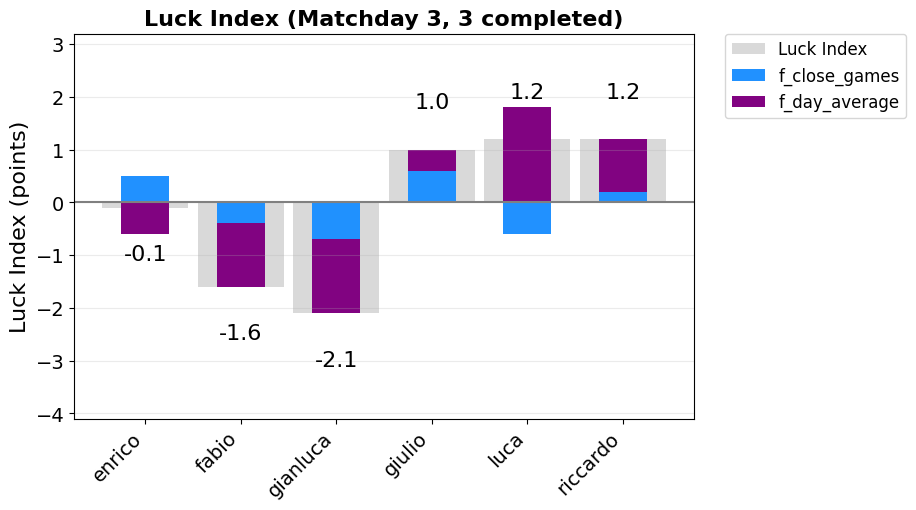

In [11]:
fanta.luck_index_plot(df_total, games, games_completed)

# Evolution Plots

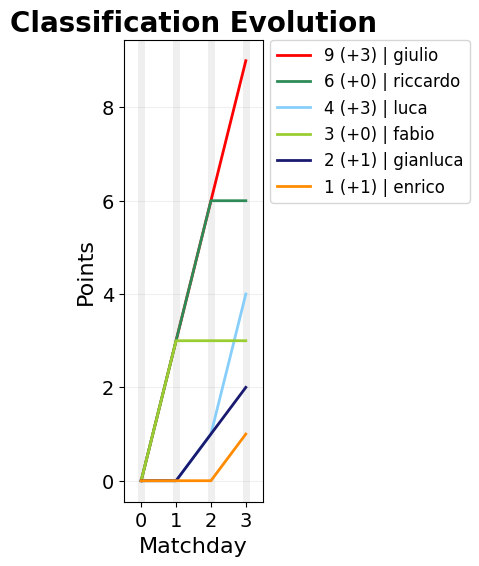

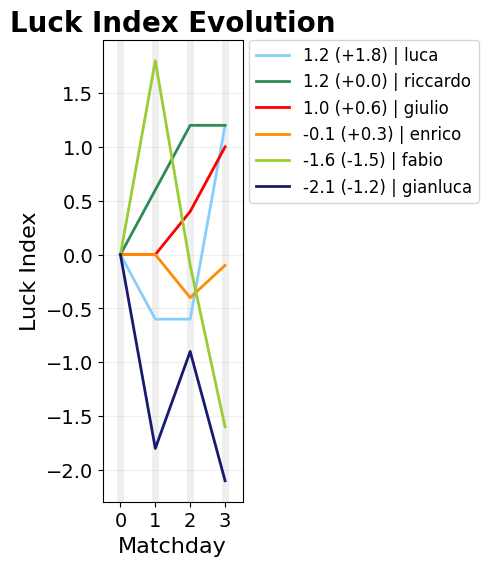

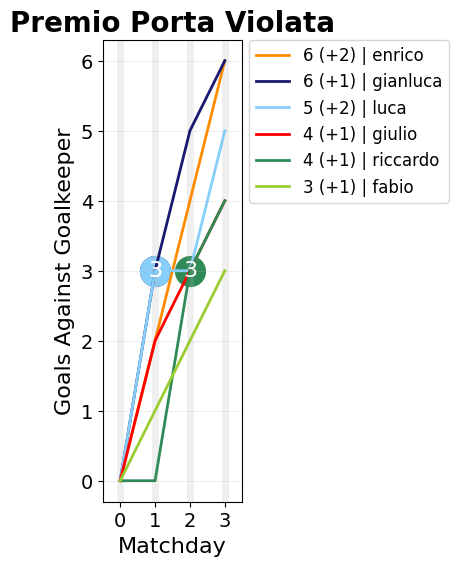

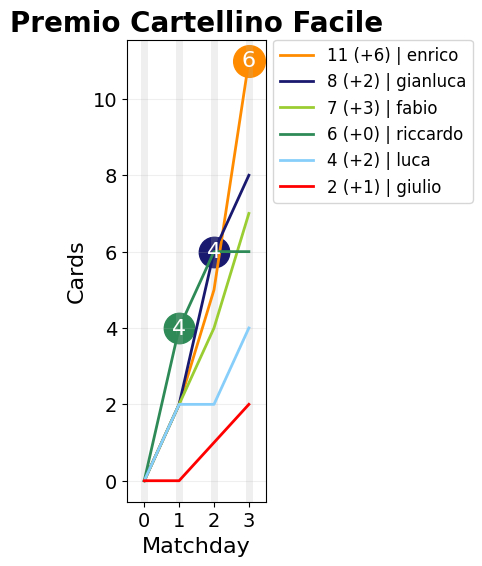

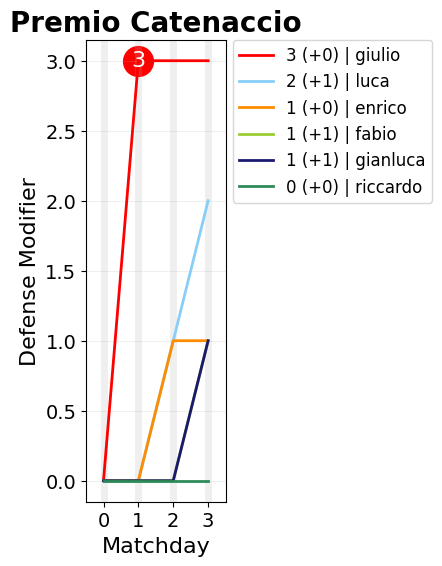

In [12]:
fanta.evo_plot(games, df_final, par='points', title='Classification Evolution', ylabel='Points', threshold=4)
fanta.evo_plot(games, df_final, par='Luck Index', title='Luck Index Evolution', ylabel='Luck Index', threshold=1.9)
fanta.evo_plot(games, df_final,
               par='goals against gk', title='Premio Porta Violata', ylabel='Goals Against Goalkeeper', threshold=2)
fanta.evo_plot(games, df_final,
               par='cards', title='Premio Cartellino Facile', ylabel='Cards', threshold=3)
fanta.evo_plot(games, df_final,
               par='defense modifier', title='Premio Catenaccio', ylabel='Defense Modifier', threshold=2) 

# Box plots

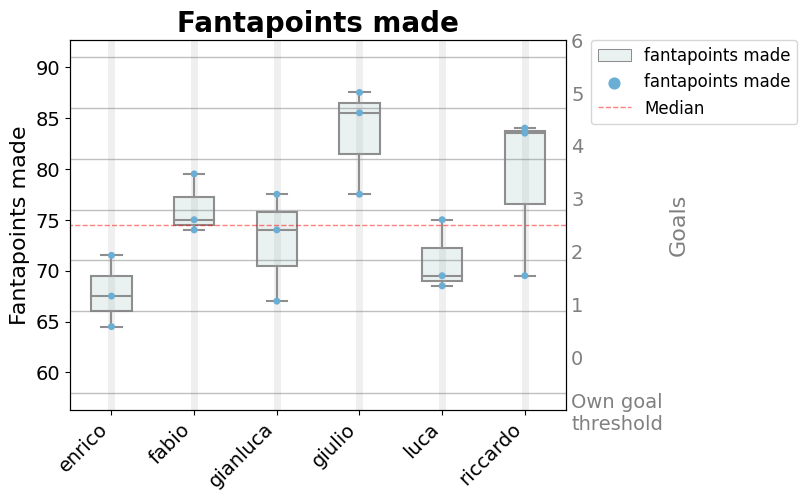

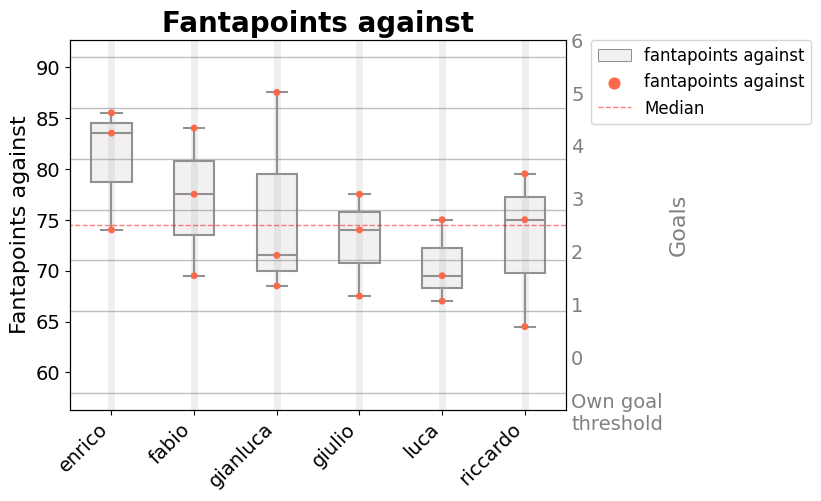

In [13]:
fanta.box_plot(df_final, fp_med,
               par='fantapoints made', label= 'Fantapoints made', title='Fantapoints made', col='cyan', pal='Blues')
fanta.box_plot(df_final, fp_med,
               par='fantapoints against', label= 'Fantapoints against', title='Fantapoints against', col='r', pal='Reds')

# Grahical display of results

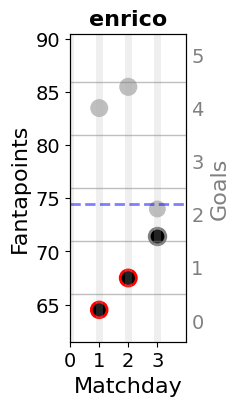

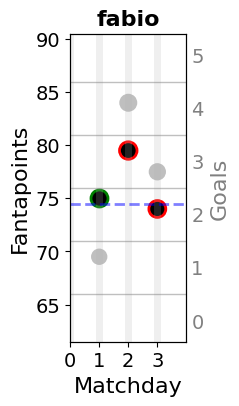

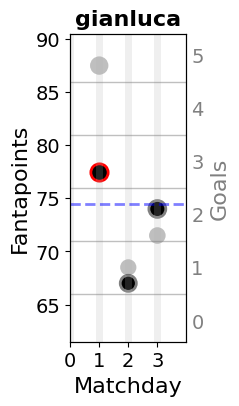

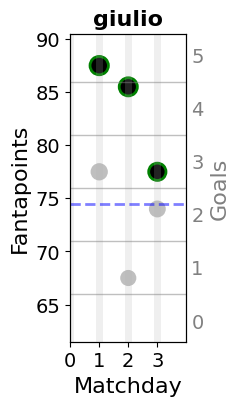

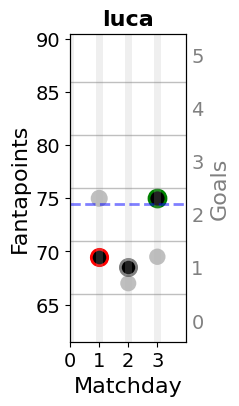

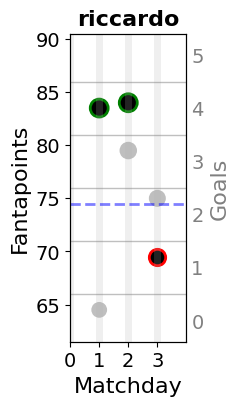

In [14]:
fanta.graphical_results(df_final, games, fp_med)

# Points and Goals vs Expected values

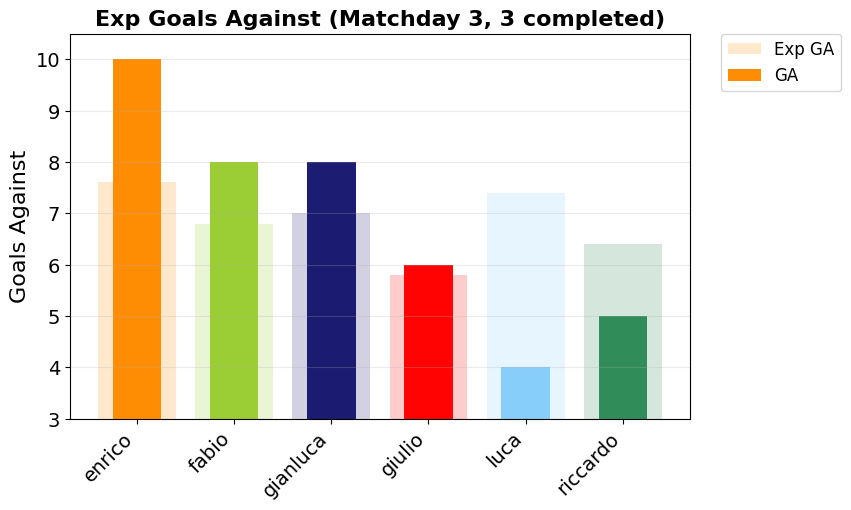

In [15]:
### Expected value of goals against, facing all other opponents ##############################
fanta.exp_goal_plot(df_total, games, games_completed)

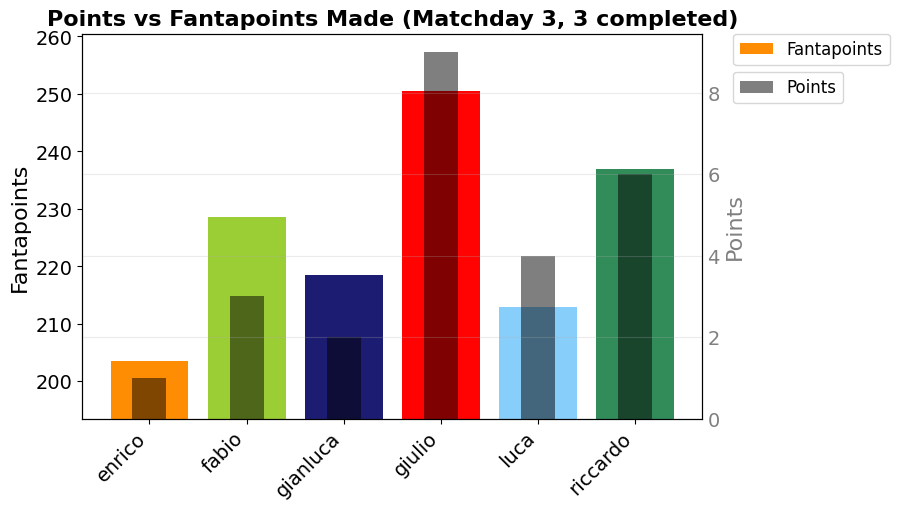

In [16]:
### Fantapoints made vs classification ###############
fanta.fantap_vs_class(df_total, games, games_completed)

# Stats & more

In [17]:
print('### CUMULATIVE DATA after matchday', games, '(', games_completed,' completed )  ###')
print('Fantapoints made:\n average =', fp_mean, '\n median =', fp_med, '\n standard deviation =', fp_std, 
      '\nGoals made:\n average =', gm_mean, '\n median =', gm_med, '\n standard deviation =', gm_std
     )

### Personal stats #####################################
personal_average = {}
for team, new_df in df_final.groupby(['team']):
    personal_average[team] = np.mean(new_df['fantapoints made'])
print('\n Personal Averages (Fantapoints):')
display(personal_average)

### CUMULATIVE DATA after matchday 3 ( 3  completed )  ###
Fantapoints made:
 average = 75.05555555555556 
 median = 74.5 
 standard deviation = 6.666435181166269 
Goals made:
 average = 2.2777777777777777 
 median = 2.0 
 standard deviation = 1.3252067157640626

 Personal Averages (Fantapoints):


{'enrico': 67.83333333333333,
 'fabio': 76.16666666666667,
 'gianluca': 72.83333333333333,
 'giulio': 83.5,
 'luca': 71.0,
 'riccardo': 79.0}

In [18]:
### Display data divided by player

print('### PERSONAL DATA ###\n')

gms = np.arange(1, games+1)

for team, new_df in df_final.groupby(['team']):
    print('Team:', config.Teams[team][0], '(',team,')')
    display(new_df.drop(['team'], axis=1).reindex(gms, fill_value='--'))
    print('\n\n')

### PERSONAL DATA ###

Team: Gianlucanonpressare ( enrico )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.5,83.5,2,2,0,0,4,L,0,0.0,0.0,0.0
2,67.5,85.5,2,3,1,1,4,L,0,0.0,-0.4,-0.4
3,71.5,74.0,2,6,0,2,2,T,1,0.5,-0.2,0.3





Team: Porti Chiusi Italiani ( fabio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,75.0,69.5,1,2,0,2,1,W,3,0.0,1.8,1.8
2,79.5,84.0,1,2,0,3,4,L,0,-0.1,-1.8,-1.9
3,74.0,77.5,1,3,1,2,3,L,0,-0.3,-1.2,-1.5





Team: La mamma di Enrico ( gianluca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,77.5,87.5,3,2,0,3,5,L,0,0.0,-1.8,-1.8
2,67.0,68.5,2,4,0,1,1,T,1,0.3,0.6,0.9
3,74.0,71.5,1,2,1,2,2,T,1,-1.0,-0.2,-1.2





Team: Dinamo Oegia ( giulio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,87.5,77.5,2,0,3,5,3,W,3,0.0,0.0,0.0
2,85.5,67.5,1,1,0,4,1,W,3,0.0,0.4,0.4
3,77.5,74.0,1,1,0,3,2,W,3,0.6,0.0,0.6





Team: Nottingham Forrest Gump ( luca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,69.5,75.0,3,2,0,1,2,L,0,0.0,-0.6,-0.6
2,68.5,67.0,0,0,1,1,1,T,1,-0.6,0.6,0.0
3,75.0,69.5,2,2,1,2,1,W,3,0.0,1.8,1.8





Team: Laggente ( riccardo )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,83.5,64.5,0,4,0,4,0,W,3,0.0,0.6,0.6
2,84.0,79.5,3,2,0,4,3,W,3,0.2,0.4,0.6
3,69.5,75.0,1,0,0,1,2,L,0,0.0,0.0,0.0
